In [6]:
import sklearn
import json
import operator
import matplotlib.pyplot as plt
import prettyplotlib as ppl
import seaborn as sns
sns.set(style='ticks', palette='Set1')
%matplotlib inline
from scipy.interpolate import interp1d
hist1 = sklearn.externals.joblib.load('agent1_indhistex')
hist2 = sklearn.externals.joblib.load('agent2_indhistex')

In [3]:
def loader(dictionary):
    def load_keys(k):
        unjsoned = json.loads(k)
        loaded = tuple( ((tuple(unjsoned[0])), unjsoned[1] ))
        return loaded
    return {load_keys(k):v for k,v in dictionary.items()}
def get_score(hist):
    loaded = {k:len(json.loads(v)) for k,v in loader(hist).items()}
    not_running = sum([v for k,v in loaded.items() if k[0][1] == 'sleeping' and k[0][3]=='sleeping'])
    zero = sum([v for k,v in loaded.items() if k[0][0] == 0])
    total = sum([v for k,v in loaded.items()])
    return not_running, zero, total, not_running/total, zero/total
print(get_score(hist1))
print(get_score(hist2))

(1, 0, 11451, 8.732861758798358e-05, 0.0)
(2289, 0, 11451, 0.19989520565889443, 0.0)


In [4]:
record = sklearn.externals.joblib.load('ind_exwriter1')
one = [(i[0], i[1]['battery']) for i in record if i[1]['_id']==0]
two = [(i[0], i[1]['battery']) for i in record if i[1]['_id']==1]

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


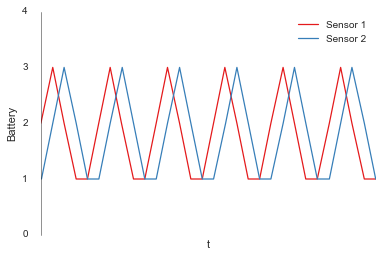

In [10]:
fig,ax = plt.subplots(1)
#one_plot = one[1083:1120]
#two_plot = two[1083:1120]
one_plot = one[9445:9475]
two_plot = two[9445:9475]
x1 = [e[0]+0.3*i for i,e in enumerate(one_plot)]
y1 =  [e[0]+0.3*i for i,e in enumerate(two_plot)]
ppl.plot(ax, x1,[i[1] for i in one_plot], label = 'Sensor 1', linewidth = 1.25  )
ppl.plot(ax, y1,[i[1] for i in two_plot], label = 'Sensor 2', linewidth = 1.25 )
ax.set_ylim([0,4])
ax.set_xlim([x1[0],x1[-1]])
ax.set_ylabel('Battery')
ax.set_xlabel('t')
ax.set_xticks([])
ax.set_yticks(range(5))
legend = plt.legend()
ax.spines['bottom'].set_visible(False)
fig.savefig('learned_ind', format = 'svg')

In [5]:
agent1 = sklearn.externals.joblib.load('agent1_battex')
loader(agent1)

{((0, 'pending', 0, 'pending'), 'go_to_sleep'): 12.589990801873126,
 ((0, 'pending', 0, 'sleeping'), 'go_to_sleep'): 680.2255295753698,
 ((0, 'pending', 1, 'pending'), 'go_to_sleep'): 753.6737796678021,
 ((0, 'pending', 1, 'running'), 'go_to_sleep'): 4.213684891307473,
 ((0, 'pending', 1, 'sleeping'), 'go_to_sleep'): 1045.864658569014,
 ((0, 'pending', 2, 'pending'), 'go_to_sleep'): -46.63705395097458,
 ((0, 'pending', 2, 'running'), 'go_to_sleep'): 405.3279454899461,
 ((0, 'pending', 2, 'sleeping'), 'go_to_sleep'): 313.96331628380295,
 ((0, 'pending', 3, 'pending'), 'go_to_sleep'): -100,
 ((0, 'pending', 3, 'running'), 'go_to_sleep'): 834.6572671065913,
 ((0, 'pending', 3, 'sleeping'), 'go_to_sleep'): 885.6186973611614,
 ((0, 'pending', 4, 'running'), 'go_to_sleep'): 397.83745844455007,
 ((0, 'pending', 5, 'sleeping'), 'go_to_sleep'): -100.0,
 ((0, 'sleeping', 0, 'pending'), 'noop'): 335.31677460489334,
 ((0, 'sleeping', 0, 'pending'), 'wakeup'): 19.711410572926567,
 ((0, 'sleeping', 

In [6]:
len(record)

22902

In [12]:

len([i for i in record if i[1]['status']=='sleeping' and i[1]['nstat']=='sleeping'])

2291

In [8]:
def time_sleeping(record):
    sleeper_indices = (ind for ind, el in enumerate(record) if
                       el[1]['status']=='sleeping' and el[1]['nstat']=='sleeping')
    times = (record[i+1][0]-record[i][0] for i in sleeper_indices)
    return sum(times)
def total_time(record):
    return record[-1][0]-record[0][0]
time_sleeping(record[0:480])/total_time(record[0:480])

0.14198704536942627

In [9]:
two_plot

[(76.503091563005, 1),
 (76.50549287900503, 2),
 (76.52104178800073, 3),
 (76.5241785649996, 2),
 (76.52998034399934, 1),
 (76.53285873600544, 1),
 (76.55022587699932, 2),
 (76.55165804200078, 3),
 (76.55697319200408, 2),
 (76.56017146300292, 1),
 (76.5663163460049, 1),
 (76.58138657800009, 2),
 (76.58266004200414, 3),
 (76.59376714799873, 2),
 (76.59501617600472, 1),
 (76.61086476300261, 1),
 (76.61219678600173, 2),
 (76.61870496199845, 3),
 (76.6209134150049, 2),
 (76.62222433800343, 1),
 (76.65167347800161, 1),
 (76.65706529000454, 2),
 (76.65840798299905, 3),
 (76.67357573700428, 2),
 (76.6783866590049, 1),
 (76.67983210400416, 1),
 (76.7036386960026, 2),
 (76.70757818499987, 3),
 (76.71689370999957, 2),
 (76.71894623100525, 1)]

In [10]:
record

[(0.7230737819991191,
  {'_id': 0,
   'battery': 4,
   'neighbour': 5,
   'nstat': 'running',
   'status': 'running'}),
 (0.7243523810029728,
  {'_id': 1,
   'battery': 4,
   'neighbour': 4,
   'nstat': 'running',
   'status': 'running'}),
 (0.7262297440029215,
  {'_id': 0,
   'battery': 3,
   'neighbour': 4,
   'nstat': 'running',
   'status': 'running'}),
 (0.7267493440012913,
  {'_id': 1,
   'battery': 3,
   'neighbour': 3,
   'nstat': 'running',
   'status': 'running'}),
 (0.7276136350046727,
  {'_id': 0,
   'battery': 2,
   'neighbour': 3,
   'nstat': 'running',
   'status': 'running'}),
 (0.7280810060037766,
  {'_id': 1,
   'battery': 2,
   'neighbour': 2,
   'nstat': 'running',
   'status': 'running'}),
 (0.7288509360005264,
  {'_id': 0,
   'battery': 1,
   'neighbour': 2,
   'nstat': 'running',
   'status': 'pending'}),
 (0.7293090220045997,
  {'_id': 1,
   'battery': 1,
   'neighbour': 1,
   'nstat': 'pending',
   'status': 'pending'}),
 (0.7407224640046479,
  {'_id': 0,
   'b

In [11]:
1804/25256

0.07142857142857142